# Batting Analysis

In [783]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/2035770273.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth',-1)


In [784]:
deli = pd.read_csv('deliveries.csv')
mat = pd.read_csv('matches.csv')

In [785]:
mat["venue"].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [786]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


    What is David Warner's score in Match 1 ?

In [787]:
deli[(deli["match_id"]==1) & (deli["batsman"]=="DA Warner")].groupby("batsman")["batsman_runs"].sum()

batsman
DA Warner    14
Name: batsman_runs, dtype: int64

    What is David Warner's score in each match?

In [788]:
deli[deli["batsman"]=="DA Warner"].groupby(["batsman","match_id"])["batsman_runs"].sum()

batsman    match_id
DA Warner  1           14
           6           76
           10          49
           14          26
           19          70
                       ..
           628         73
           631         18
           634         28
           635         93
           636         69
Name: batsman_runs, Length: 114, dtype: int64

       What are scores of different batsman in each match? 

In [789]:
deli.groupby(["match_id","batsman"])["batsman_runs"].sum().head(5)

match_id  batsman    
1         A Choudhary    6 
          BCJ Cutting    16
          CH Gayle       32
          DA Warner      14
          DJ Hooda       16
Name: batsman_runs, dtype: int64

In [790]:
def by_innings(deli,innings):
    deli = deli[deli["inning"] == innings]
    deli.reset_index(inplace=True,drop=True)
    
    
    deli["isDot"]= deli["batsman_runs"].apply(lambda x: 1 if x==0 else 0)
    deli["isOne"]= deli["batsman_runs"].apply(lambda x: 1 if x==1 else 0)
    deli["isTwo"]= deli["batsman_runs"].apply(lambda x: 1 if x==2 else 0)
    deli["isThree"]= deli["batsman_runs"].apply(lambda x: 1 if x==3 else 0)
    deli["isFour"]= deli["batsman_runs"].apply(lambda x: 1 if x==4 else 0)
    deli["isSix"]= deli["batsman_runs"].apply(lambda x: 1 if x==6 else 0)
    runs = pd.DataFrame(deli.groupby("batsman")["batsman_runs"].sum()).reset_index().rename(columns={"batsman_runs":"runs"})
    balls = pd.DataFrame(deli.groupby("batsman")["match_id"].count()).reset_index().rename(columns = {"match_id":"balls"})
    innings = pd.DataFrame(deli.groupby(["batsman"])["match_id"].apply(lambda x:len(np.unique(x)))).reset_index().rename(columns = {"match_id":"matches"})
    dismissals = pd.DataFrame(deli.groupby("batsman")["player_dismissed"].count())
    sixes = pd.DataFrame(deli.groupby("batsman")["isSix"].sum()).reset_index().rename(columns = {"isSix":"Sixes"})
    fours = pd.DataFrame(deli.groupby("batsman")["isFour"].sum()).reset_index().rename(columns = {"isFour":"fours"})
    dots = pd.DataFrame(deli.groupby("batsman")["isDot"].sum()).reset_index().rename(columns = {"isDot":"dots"})
    deli = pd.merge(innings, runs, on="batsman").merge(balls,on ="batsman").merge(dismissals, on ="batsman").merge(fours, on = "batsman").merge(sixes, on = "batsman")
    
    
    return deli 

In [791]:
deli.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [792]:
frst_inn = by_innings(deli,1)
sec_inn = by_innings(deli,2)

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/2707112173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deli["isDot"]= deli["batsman_runs"].apply(lambda x: 1 if x==0 else 0)
/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/2707112173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deli["isOne"]= deli["batsman_runs"].apply(lambda x: 1 if x==1 else 0)
/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/2707112173.py:8: SettingWithCopyWarning: 
A value i

In [793]:
frst_inn.head(2)

,batsman,matches,runs,balls,player_dismissed,fours,Sixes
0,A Ashish Reddy,13,166,115,7,6,10
1,A Chandila,2,4,7,1,0,0


In [794]:
sec_inn.head(2)

,batsman,matches,runs,balls,player_dismissed,fours,Sixes
0,A Ashish Reddy,10,114,81,8,10,5
1,A Chopra,1,2,3,1,0,0


In [795]:
frst_inn["RPI"] = round(frst_inn["runs"]/frst_inn["matches"],2)

In [796]:
sec_inn["RPI"] = round(sec_inn["runs"]/sec_inn["matches"],2)

In [797]:
frst_inn.head(1)


,batsman,matches,runs,balls,player_dismissed,fours,Sixes,RPI
0,A Ashish Reddy,13,166,115,7,6,10,12.77


In [798]:
sec_inn.head(1)

,batsman,matches,runs,balls,player_dismissed,fours,Sixes,RPI
0,A Ashish Reddy,10,114,81,8,10,5,11.4


In [799]:
frst_inn.rename(columns = {"matches":"1st_inn_matches","runs":"1st_inn_runs","balls":"1st_inn_balls","player_dismissed":"1st_inn_dismissals","fours":"1st_inn_fours","Sixes":"1st_inn_sixes","RPI":"1st_inn_RPI"},inplace=True)

In [800]:
sec_inn.rename(columns = {"matches":"2nd_inn_matches","runs":"2nd_inn_runs","balls":"2nd_inn_balls","player_dismissed":"2nd_inn_dismissals","fours":"2nd_inn_fours","Sixes":"2nd_inn_sixes","RPI":"2nd_inn_RPI"},inplace=True)

In [801]:
innings_split = pd.merge(frst_inn,sec_inn,on="batsman")

In [802]:
innings_split.head(2)

,batsman,1st_inn_matches,1st_inn_runs,1st_inn_balls,1st_inn_dismissals,1st_inn_fours,1st_inn_sixes,1st_inn_RPI,2nd_inn_matches,2nd_inn_runs,2nd_inn_balls,2nd_inn_dismissals,2nd_inn_fours,2nd_inn_sixes,2nd_inn_RPI
0,A Ashish Reddy,13,166,115,7,6,10,12.77,10,114,81,8,10,5,11.4
1,A Chopra,5,51,72,4,7,0,10.20,1,2,3,1,0,0,2.0


In [803]:
def balls_per_dismissals(balls, dismissals):
    if dismissals > 0:
        return round(balls/dismissals,2)
    else:
        return balls/1

def balls_per_boundary(balls,boundaries):
    if boundaries > 0:
        return round(balls/boundaries,2)
    else:
        return balls/1
        

In [804]:
import seaborn as sns

Text(0.5, 1.0, 'Comparison of 1st Inn Avg scores vs 2nd Inn Avg Scores')

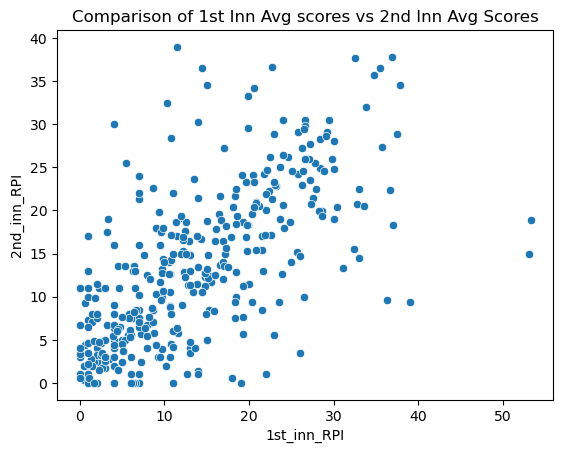

In [805]:
sns.scatterplot(x=innings_split["1st_inn_RPI"],y=innings_split["2nd_inn_RPI"])
plt.title("Comparison of 1st Inn Avg scores vs 2nd Inn Avg Scores")


In [806]:
innings_split.head()

,batsman,1st_inn_matches,1st_inn_runs,1st_inn_balls,1st_inn_dismissals,1st_inn_fours,1st_inn_sixes,1st_inn_RPI,2nd_inn_matches,2nd_inn_runs,2nd_inn_balls,2nd_inn_dismissals,2nd_inn_fours,2nd_inn_sixes,2nd_inn_RPI
0,A Ashish Reddy,13,166,115,7,6,10,12.77,10,114,81,8,10,5,11.4
1,A Chopra,5,51,72,4,7,0,10.20,1,2,3,1,0,0,2.0
2,A Choudhary,1,15,12,0,1,0,15.00,2,10,8,2,0,1,5.0
3,A Flintoff,1,22,14,0,2,1,22.00,2,40,43,2,3,1,20.0
4,A Kumble,5,11,16,1,1,0,2.20,10,24,33,1,2,0,2.4


In [807]:
innings_split.groupby("batsman")["1st_inn_runs","2nd_inn_runs"].sum().sort_values(by=["1st_inn_runs","2nd_inn_runs"],ascending = False)

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/3429111335.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  innings_split.groupby("batsman")["1st_inn_runs","2nd_inn_runs"].sum().sort_values(by=["1st_inn_runs","2nd_inn_runs"],ascending = False)


,1st_inn_runs,2nd_inn_runs
batsman,,
SK Raina,2647,1893
V Kohli,2391,2027
RG Sharma,2344,1863
S Dhawan,2262,1299
MS Dhoni,2232,1328
...,...,...
TS Mills,0,8
AF Milne,0,7
CJ Jordan,0,3


## Problem Statement : 
### How good is Player X against MI in Wankhede when they are playing 3 spinners? 

In [808]:
matches.head(1)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [809]:
matches.rename(columns={"id":"match_id"},inplace=True)

In [810]:
deli.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [811]:
comb = pd.merge(deli,matches,on="match_id",how="left")

In [812]:
comb.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [813]:
comb["overs_bowled"] = comb["over"].apply(lambda x:x-1)

In [814]:
comb.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,overs_bowled
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0


In [815]:
def get_phase(overs_bowled):
    if overs_bowled < 6:
        return "Powerplay"
    elif overs_bowled <15:
        return "Middle"
    else:
        return "Death"
    

In [816]:
comb["phase"] = comb["overs_bowled"].apply(lambda x: get_phase(x))

In [817]:
comb.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,overs_bowled,phase
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0,Powerplay
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0,Powerplay


In [818]:
comb.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,overs_bowled,phase
141372,598,1,Sunrisers Hyderabad,Rising Pune Supergiants,10,1,S Dhawan,NV Ojha,R Ashwin,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2016,Hyderabad,2016-04-26,Sunrisers Hyderabad,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,1,Rising Pune Supergiants,34,0,AB Dinda,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,CK Nandan,NaN,9,Middle
12374,53,1,Mumbai Indians,Kolkata Knight Riders,8,1,SS Tiwary,RG Sharma,Kuldeep Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2017,Kolkata,2017-05-13,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens,A Nand Kishore,S Ravi,NaN,7,Middle


In [819]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [820]:
comb.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,overs_bowled,phase
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0,Powerplay
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0,Powerplay


In [821]:
comb["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [822]:
comb["venue"].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [823]:
def by_Custom(df,curr_venue,curr_phase,curr_opposition):
    
    df = df[(df["venue"] == curr_venue) & (df["bowling_team"] == curr_opposition) & (df["phase"] == curr_phase)]
    df.reset_index(inplace=True,drop=True)
    
    
    df["isDot"]= df["batsman_runs"].apply(lambda x: 1 if x==0 else 0)
    df["isOne"]= df["batsman_runs"].apply(lambda x: 1 if x==1 else 0)
    df["isTwo"]= df["batsman_runs"].apply(lambda x: 1 if x==2 else 0)
    df["isThree"]= df["batsman_runs"].apply(lambda x: 1 if x==3 else 0)
    df["isFour"]= df["batsman_runs"].apply(lambda x: 1 if x==4 else 0)
    df["isSix"]= df["batsman_runs"].apply(lambda x: 1 if x==6 else 0)
    
    df["SR"] = round((df["batsman_runs"]/df["ball"])*100,2)
    
   
    
    runs = pd.DataFrame(df.groupby("batsman")["batsman_runs"].sum()).reset_index().rename(columns={"batsman_runs":"runs"})
    balls = pd.DataFrame(df.groupby("batsman")["match_id"].count()).reset_index().rename(columns = {"match_id":"balls"})
    innings = pd.DataFrame(df.groupby(["batsman"])["match_id"].apply(lambda x:len(np.unique(x)))).reset_index().rename(columns = {"match_id":"innings"})
    dismissals = pd.DataFrame(df.groupby("batsman")["player_dismissed"].count()).reset_index().rename(columns ={"player_dismissed":"dismissals"})
    sixes = pd.DataFrame(df.groupby("batsman")["isSix"].sum()).reset_index().rename(columns = {"isSix":"sixes"})
    fours = pd.DataFrame(df.groupby("batsman")["isFour"].sum()).reset_index().rename(columns = {"isFour":"fours"})
    

    dots = pd.DataFrame(df.groupby("batsman")["isDot"].sum()).reset_index().rename(columns = {"isDot":"dots"})


    
    
    df = pd.merge(innings, runs, on="batsman").merge(balls,on ="batsman").merge(dismissals, on ="batsman").merge(fours, on = "batsman").merge(sixes, on = "batsman").merge(dots, on = "batsman")
    
    
    df["RPI"] = round(df["runs"]/df["innings"],2)
    df["SR"] = round(100*(df["runs"]/df["balls"]),2)
    df["BPD"] = df.apply(lambda x:balls_per_dismissals(x["balls"],x["dismissals"]),axis=1)
    df["BPB"] = df.apply(lambda x:balls_per_boundary(x["balls"],x["fours"]+x["sixes"]),axis=1)
    df["dot%"] = round((df["dots"]/df["balls"])*100,2)

    
    return df

In [824]:
df.head()

,batsman,innings,runs,balls,dismissals,fours,sixes,dots,RPI,SR,BPD,BPB,dot%,calc_SR,calc_RPI,calc_BPD,calc_dot,dev_best_SR,dev_best_RPI,dev_best_BPD,dev_best_dot,dev_best_sqrt,dev_worst_SR,dev_worst_RPI,dev_worst_BPD,dev_worst_dot,dev_worst_sqrt,score
45,JH Kallis,5,124,124,3,10,1,39,24.8,100.00,41.33,11.27,31.45,7.478994,4.604140,4.498969,7.516798,7.297181,0.005559,0.000000,0.000000,7.302740,6.460185,17.211683,8.891740,10.049918,42.613525,0.85370
90,S Dhawan,5,39,48,2,2,0,18,7.8,81.25,24.00,24.00,37.50,4.937305,0.455443,1.517067,10.686959,27.489247,17.835894,8.891740,10.049918,64.266798,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
105,V Kohli,7,175,150,4,11,5,50,25.0,116.67,37.50,9.38,33.33,10.180323,4.678700,3.703776,8.442328,0.000000,0.000000,0.632332,0.856605,1.488937,27.489247,17.835894,4.781697,5.038367,55.145205,0.97371


In [825]:
df = by_Custom(comb,"Wankhede Stadium","Middle","Mumbai Indians")

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/953581364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["isDot"]= df["batsman_runs"].apply(lambda x: 1 if x==0 else 0)
/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/953581364.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["isOne"]= df["batsman_runs"].apply(lambda x: 1 if x==1 else 0)
/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/953581364.py:9: SettingWithCopyWarning: 
A value is trying to

In [826]:
df.tail()

,batsman,innings,runs,balls,dismissals,fours,sixes,dots,RPI,SR,BPD,BPB,dot%
118,WD Parnell,1,5,5,0,0,0,1,5.00,100.00,5.00,5.00,20.00
119,WP Saha,3,71,51,1,6,4,18,23.67,139.22,51.00,5.10,35.29
120,Y Venugopal Rao,1,30,18,1,4,1,5,30.00,166.67,18.00,3.60,27.78
121,YK Pathan,5,69,64,3,5,2,23,13.80,107.81,21.33,9.14,35.94
122,Yuvraj Singh,4,52,54,1,4,2,27,13.00,96.30,54.00,9.00,50.00


### Weights using SATTY scale 

In [827]:
def calc_score():

    wt_sr, wt_rpi, wt_bpd, wt_dot_percentage = 0.13, 0.27, 0.16, 0.45



    df["calc_SR"] = df["SR"]**2
    df["calc_RPI"] = df["RPI"]**2
    df["calc_BPD"] = df["BPD"]**2
    df["calc_dot"] = df["dot%"]**2

    sq_sr,sq_rpi,sq_bpd,sq_dot = np.sqrt(df[["calc_SR","calc_RPI","calc_BPD","calc_dot"]].sum(axis=0))

    df["calc_SR"] = (df["calc_SR"]/sq_sr)*wt_sr
    df["calc_RPI"] = (df["calc_RPI"]/sq_rpi)*wt_rpi
    df["calc_BPD"] = (df["calc_BPD"]/sq_bpd)*wt_bpd
    df["calc_dot"] = (df["calc_dot"]/sq_dot)*wt_dot_percentage

    best_sr, worst_sr = max(df['calc_SR']), min(df['calc_SR'])
    best_rpi, worst_rpi = max(df['calc_RPI']), min(df['calc_RPI'])
    best_bpd, worst_bpd = max(df['calc_BPD']), min(df['calc_BPD'])
    best_dot, worst_dot = min(df['calc_dot']), max(df['calc_dot'])

    df['dev_best_SR'] = (df['calc_SR']-best_sr)**2
    df['dev_best_RPI'] = (df['calc_RPI']-best_rpi )**2
    df['dev_best_BPD'] = (df['calc_BPD']-best_bpd)**2
    df['dev_best_dot'] = (df['calc_dot']-best_dot)**2

    df['dev_best_sqrt'] = df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot'], axis = 1) 

    df['dev_worst_SR'] = (df['calc_SR']-worst_sr)**2
    df['dev_worst_RPI'] = (df['calc_RPI']-worst_rpi)**2
    df['dev_worst_BPD'] = (df['calc_BPD']-worst_bpd)**2
    df['dev_worst_dot'] = (df['calc_dot']-worst_dot)**2

    df['dev_worst_sqrt'] = df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot'], axis = 1)

    df['score'] = df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

    Using Topsis method 

In [828]:
df = by_Custom(comb,"MA Chidambaram Stadium, Chepauk","Middle","Chennai Super Kings")

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/953581364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["isDot"]= df["batsman_runs"].apply(lambda x: 1 if x==0 else 0)
/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/953581364.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["isOne"]= df["batsman_runs"].apply(lambda x: 1 if x==1 else 0)
/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_50221/953581364.py:9: SettingWithCopyWarning: 
A value is trying to

In [829]:
df=df[df["innings"]>=2]

In [830]:
calc_score()

In [831]:
df.shape

(40, 28)

In [832]:
df[["batsman","score"]].sort_values("score",ascending=False).head(10)

,batsman,score
96,SE Marsh,0.973133
101,SR Watson,0.886001
4,AB de Villiers,0.844493
36,G Gambhir,0.800335
75,NV Ojha,0.751551
111,Y Venugopal Rao,0.743343
69,MS Bisla,0.731556
24,DA Miller,0.645003
105,V Kohli,0.635794
6,AD Mathews,0.615262
